In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Values from storage technologies table in PGP paper
Currently, table 1 in the Intro (this will likely change?)

I am taking the min and max values for each tech regardless of the sources.

In [2]:
techs = {
    'flywheel' : {
        'cap_div_power' : [250,350],
        'cap_div_energy' : [1000,5000],
    },
    'capacitor' : {
        'cap_div_power' : [200,400],
        'cap_div_energy' : [500,1000],
    },
    'lead-acid battery' : {
        'cap_div_power' : [200,600],
        'cap_div_energy' : [50,400],
    },
    'Li-ion battery' : {
        'cap_div_power' : [280,1874],
        'cap_div_energy' : [225,513],
    },
    'redox flow (V)' : {
        'cap_div_power' : [1027,1956],
        'cap_div_energy' : [447,4620],
    },
    'pumped\nhydropower' : {
        'cap_div_power' : [975,4300],
        'cap_div_energy' : [5,100],
    },
    'compressed air' : {
        'cap_div_power' : [650,1000],
        'cap_div_energy' : [2,50],
    },
    #'PGP' : {
    #    'cap_div_power' : [6500,6600],
    #    'cap_div_energy' : [5.6,8.8],
    #},
    'PGP' : { # These ranges are based on 1-yr and 6-yr runs and 4,600-10,000 $/kW fuel cell range from Davis et al ref 132.
        'cap_div_power' : [5300,11000],
        'cap_div_energy' : [4.6,14],
    },
}

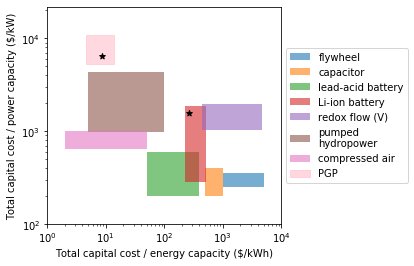

In [3]:
def get_maxes(techs):
    Mx, My = 0, 0
    for tech, tab in techs.items():
        x = tab['cap_div_energy']
        y = tab['cap_div_power']
        if x[1] > Mx:
            Mx = x[1]
        if y[1] > My:
            My = y[1]
    return Mx, My

def add_star(ax, cords):
    
    ax.scatter(cords[0], cords[1], color='black', marker='*')

fig, ax = plt.subplots()#figsize=(10,10))

Mx, My = get_maxes(techs)

pgp_baseline_value = [8.8, 6500]
liIon_baseline_value = [261, 1566]

for tech, tab in techs.items():
    xs = np.linspace(tab['cap_div_energy'][0], tab['cap_div_energy'][1], 100)
    top = np.ones(100) * tab['cap_div_power'][1]
    bottom = np.ones(100) * tab['cap_div_power'][0]
    #print(tech, tab)
    
    alpha=0.6
    if tech in ['PGP', 'redox flow']:
        color = 'pink' if tech == 'PGP' else 'purple'
        ax.fill_between(xs, bottom, top, label=tech, alpha=alpha, color=color)
    else:
        ax.fill_between(xs, bottom, top, label=tech, alpha=alpha)

ax.set_xlim(1, Mx*2)
ax.set_ylim(100, My*2)
ax.set_xlabel('Total capital cost / energy capacity ($/kWh)')
ax.set_ylabel('Total capital cost / power capacity ($/kW)')
plt.yscale('log')
plt.xscale('log')

add_star(ax, pgp_baseline_value)
add_star(ax, liIon_baseline_value)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.legend(ncol=2)

plt.savefig('storage_techs.pdf')